## Transforming Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Loading datasets
ratings = pd.read_csv("./data/BX-Book-Ratings.csv", sep=';', encoding='latin-1')
# additional arguments to fix parsing errors
books  = pd.read_csv("./data/BX-Books.csv", sep=';', quotechar='"',
                     escapechar='\\', engine="python", encoding='latin-1')
users  = pd.read_csv("./data/BX-Users.csv", sep=';', encoding='latin-1')

display(ratings)
display(books)
display(users)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [81]:
# replacing zero ratings with mean rating of book
grouped_books = ratings.groupby('ISBN')['Book-Rating']
ratings["Book-Rating"] = grouped_books.transform(lambda x : x.replace(0, x.mean()))

# selecting subset with books having 200+ ratings and users having rated 5+ times
book_rating_counts = ratings.groupby('ISBN').size()
user_rating_counts = ratings.groupby('User-ID').size()
# print(book_rating_counts)
# print(user_rating_counts)

# .index to extract ISBN values from Series... extracts list of ISBNs
book_subset = book_rating_counts[book_rating_counts >= 200].index
users_subset = user_rating_counts[user_rating_counts >= 5].index
# print(book_subset)
# print(users_subset)

# fits both criterion
final_subset = ratings[ratings['ISBN'].isin(book_subset) &
                       ratings['User-ID'].isin(users_subset)]
# display(final_subset)

# transforming into user-book ratings matrix
matrix = final_subset.pivot_table(values='Book-Rating', index = "User-ID", columns='ISBN')
matrix = matrix.fillna(0)

X = matrix.values
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
# (a) Top 3 books/movies in terms of number of users that have rated them

# count and find the 3 isbns with most ratings
ratings_per_book = final_subset["ISBN"].value_counts()
ratings_per_book = ratings_per_book.sort_values(ascending=False)
top_three_books = ratings_per_book[:3]
# print(top_three_books)

# obtain titles from book dataframe
titles_and_isbn = books[["ISBN", "Book-Title"]]
# merge to obtain target data
top_book_ratings = titles_and_isbn.merge(top_three_books, left_on="ISBN", right_index=True)
display(top_book_ratings)

# (b) Top 3 users that have rated the greatest number of books/movies

num_ratings_per_user = final_subset['User-ID'].value_counts()
num_ratings_per_user = num_ratings_per_user.sort_values(ascending=False)
top_users_rated = num_ratings_per_user[:3]
display(top_users_rated)

,ISBN,Book-Title,count
26,0971880107,Wild Animus,1686
408,0316666343,The Lovely Bones: A Novel,981
748,0385504209,The Da Vinci Code,722


User-ID
11676    193
35859    121
16795    119
Name: count, dtype: int64

## Clustering

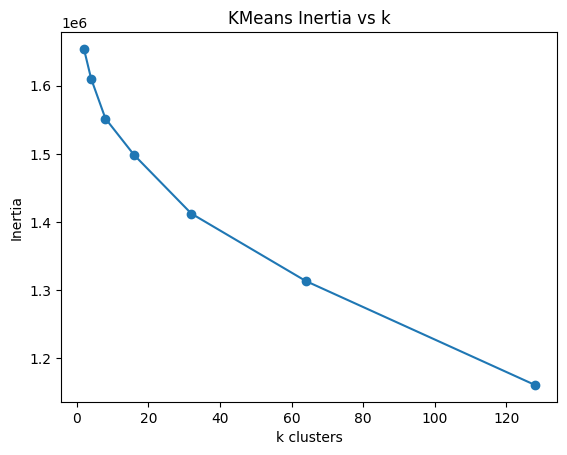

In [ ]:
# values of k = [2, 4, 8, 16, 32, 64, 128], apply k-means
# measure inertia for each value of k
# plot resulting inertia scores for each choice of k

# (a)
ks = [2,4,8,16,32,64,128]
# corresponding inertias
inertias = []

# KMeans and inertias for each k
# setting random_state for reproducibility
for k in ks:
  kmeans = KMeans(n_clusters= k, random_state=0).fit(X)
  inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker="o")
plt.xlabel("k clusters")
plt.ylabel("Inertia")
plt.title("KMeans Inertia vs k")
plt.show()

# (b)
# The most appropriate value of k for this data would be 30 based on 
# the elbow method. k = 30 represents the "elbow" which estimates the best value
# for K based on our data.

In [ ]:
# (c)
# Clustering using chosen k = 30
k = 30
kmeans_final = KMeans(n_clusters=k, random_state= 0)
clusters = kmeans_final.fit_predict(X)

# add cluster labels
matrix["cluster"] = clusters

# top 3 highest rated (on average) books in each cluster
cluster_groups = matrix.groupby("cluster")
titles = books.set_index('ISBN')["Book-Title"]

for c, group in cluster_groups:
  print(f"\nCluster {c}:")

  # calculate mean ratings of each cluster group
  means = group.drop(columns="cluster").mean()
  sorted_means = means.sort_values(ascending=False)
  top_three_rated = sorted_means[:3]

  #convert ISBN to titles
  top_isbns = top_three_rated.index
  top_titles = titles.reindex(top_isbns)

  #print top three highest rated books
  for isbn, title in top_titles.items():
    print(f"{isbn}/{title}")


Cluster 0:
0971880107/Wild Animus
0316601950/The Pilot's Wife : A Novel
0553572997/The Alienist

Cluster 1:
0316666343/The Lovely Bones: A Novel
0316096199/Lucky : A Memoir
0312278586/The Nanny Diaries: A Novel

Cluster 2:
0385504209/The Da Vinci Code
0671027360/Angels &amp; Demons
0316666343/The Lovely Bones: A Novel

Cluster 3:
0446605239/The Notebook
0446610038/1st to Die: A Novel
0446672211/Where the Heart Is (Oprah's Book Club (Paperback))

Cluster 4:
0060976845/Little Altars Everywhere: A Novel
0060928336/Divine Secrets of the Ya-Ya Sisterhood: A Novel
0316601950/The Pilot's Wife : A Novel

Cluster 5:
0440234743/The Testament
0440224764/The Partner
0440241073/The Summons

Cluster 6:
0679781587/nan
0316666343/The Lovely Bones: A Novel
0312195516/The Red Tent (Bestselling Backlist)

Cluster 7:
0312195516/The Red Tent (Bestselling Backlist)
0316666343/The Lovely Bones: A Novel
0061009059/One for the Money (Stephanie Plum Novels (Paperback))

Cluster 8:
059035342X/Harry Potter and t

## PCA Analysis

## Singular Value Decomposition